# Mini projects

## Green screen

1. Create a method to process an image with a green screen, replace the green screen with a background image

1. Adapt it to use your webcam and try it out, you might need to change the green screen to another color that you can use as your backgrouns (for example maybe white if you have a white wall behind you)

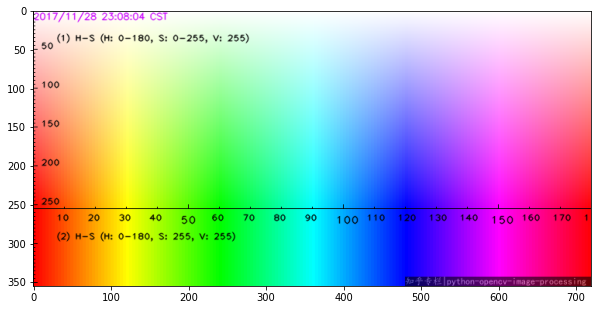

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(cv2.imread('img/hsv.png'),cv2.COLOR_BGR2RGB));


In [29]:
green_image = cv2.cvtColor(cv2.imread('img/green.jpg'),cv2.COLOR_BGR2RGB)
background_image = cv2.cvtColor(cv2.imread('img/photo.jpeg'),cv2.COLOR_BGR2RGB)


green_image = cv2.resize(green_image,(500,330))
background_image = cv2.resize(background_image,(500,330))

hsv_image = cv2.cvtColor(green_image,cv2.COLOR_RGB2HSV)
lower = (40,100,0)
higher = (75,255,255)
mask = cv2.inRange(hsv_image,lower,higher)
image = cv2.bitwise_and(hsv_image,hsv_image,mask = mask)
hsv_image = hsv_image - image
hsv_image = np.where(hsv_image == 0,background_image,hsv_image)




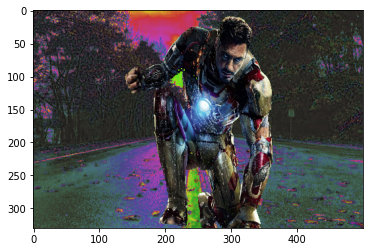

In [32]:
plt.imshow(cv2.cvtColor(hsv_image,cv2.COLOR_HSV2RGB))

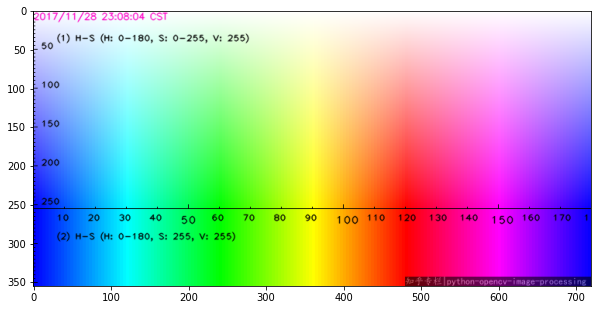

In [36]:
plt.figure(figsize = (10,10))
plt.imshow(cv2.imread('img/hsv.png'));

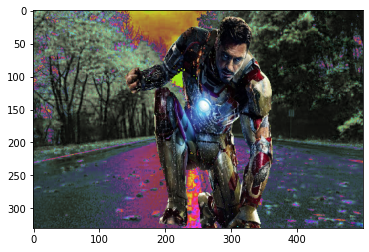

In [42]:
green_image = cv2.imread('img/green.jpg')
background_image = cv2.imread('img/photo.jpeg')


green_image = cv2.resize(green_image,(500,330))
background_image = cv2.resize(background_image,(500,330))

hsv_image = cv2.cvtColor(green_image,cv2.COLOR_BGR2HSV)

lower = (40,100,0)
higher = (75,255,255)

mask = cv2.inRange(hsv_image,lower,higher)

image = cv2.bitwise_and(hsv_image,hsv_image,mask = mask)
hsv_image = hsv_image - image
hsv_image = np.where(hsv_image == 0,background_image,hsv_image)
plt.imshow(cv2.cvtColor(hsv_image,cv2.COLOR_HSV2RGB));




## Color images to black and white and back!

1. Using a color image, load it with openCV then transform it to HSV and make it Grayscale (without transforming it to grayscale!)
1. Convert the grayscale image back to color.

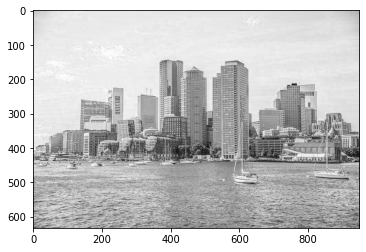

In [43]:
rgb_image = cv2.cvtColor(cv2.imread('img/day3.jpg'),cv2.COLOR_BGR2RGB)
hsv_image = cv2.cvtColor(rgb_image,cv2.COLOR_RGB2HSV)

H,S,V = cv2.split(hsv_image)
plt.imshow(V,cmap = 'gray');

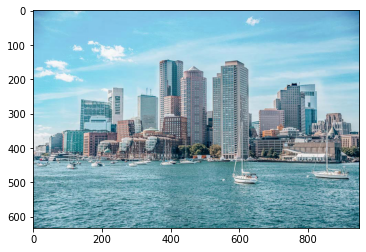

In [44]:
hsv_color_image = cv2.cvtColor(cv2.merge([H,S,V]),cv2.COLOR_HSV2RGB)
plt.imshow(hsv_color_image);

## Day or night?

1. Using all you have learned so far about computer vision, implement at least one method (or more!) to check if a certain image corresponds to a day or a night image.
1. Use different images to check if your approach is working

Picture was taken during the day


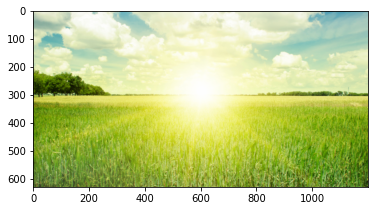

In [45]:
def image(img):
    rgb_image = cv2.cvtColor(cv2.imread(img),cv2.COLOR_BGR2RGB)
    hsv_image = cv2.cvtColor(rgb_image,cv2.COLOR_RGB2HSV)
    
    #standard or resize
    #resize_img = cv2.resize(rgb_image,(1100,600))
    
    ##sum of pixles
    pixles_values_sum = np.sum(hsv_image[:,:,2])
    
    ## are of pixles
    area = hsv_image.shape[0]*hsv_image.shape[1]
    
    ##classification
    if (pixles_values_sum/area) >= 127.5:
        plt.imshow(rgb_image)
        print('Picture was taken during the day')
    else:
        plt.imshow(rgb_image)
        print('Picture was taken during the night')
image('img/day5.png')
    
    